In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import optimizers
import os
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
from keras.preprocessing import image
import cv2
from keras.models import load_model
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir("your path")
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [4]:
test_dir = os.path.join(fileDir,'dataset\\test')

In [5]:
test_dir

'D:\\GLIM\\CAPSTONE\\Algo\\Algo2_0908\\dataset\\test'

In [6]:
categories_list = ['bed','chair','cupboard']


In [7]:
categories_list[0]

'bed'

In [8]:
#my_model =load_model(os.path.join(fileDir,'vgg16-cnn-best_10Categries25Epochs.hdf5'))
my_model =load_model(os.path.join(fileDir,'model_fc_1508_run15_cat3.h5'))

In [9]:
df = pd.DataFrame(columns=['filename','image','act_cat_name','pred_cat_name','act_cat','pred_cat','modified_image'])

In [10]:
image_size=224
#image_path=os.path.join(test_dir,'modified\\')
image_path="your path\\Anaconda3\\Algo\\test_images\\output\\good"
print(image_path)


C:\Users\Vibha2023\Anaconda3\Algo\test_images\output\good


In [11]:
for infile in glob.glob(image_path + "/*.jpg"):
    l_images=[]
    img = cv2.imread(infile)
    img = cv2.resize(img,(image_size,image_size),3)
    img = np.array(img)
    img = img / 255.0
    img = img.reshape(1,image_size,image_size,3)
    filename_w_ext = os.path.basename(infile)
    filename, file_extension = os.path.splitext(filename_w_ext)
    act_cat_name = filename[:-1]
    if act_cat_name =='bed':
        act_cat = 0
    elif act_cat_name =='chair':
        act_cat=1
    elif act_cat_name=='cupboard':
        act_cat=2
    
    pred_cat = int(my_model.predict_classes(img))
    pred_cat_name = categories_list[int(my_model.predict_classes(img))]
    l_images.append(infile)
    l_images.append(filename_w_ext)
    l_images.append(act_cat_name)
    l_images.append(pred_cat_name)
    l_images.append(act_cat)
    l_images.append(pred_cat)
    if filename[-1:] =='M':
        modified = 'Y'
    else:
        modified = 'N'
    l_images.append(modified)
    df = df.append(pd.Series(l_images, index=df.columns),ignore_index=True)
    print(act_cat_name,act_cat,pred_cat_name,pred_cat, modified)
   # print(infile, filename_w_ext, act_cat_name,pred_cat)

bed 0 chair 1 N
chair 1 chair 1 N
cupboard 2 cupboard 2 N
cupboard 2 cupboard 2 N
cupboard 2 chair 1 N


In [12]:
df

,filename,image,act_cat_name,pred_cat_name,act_cat,pred_cat,modified_image
0,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,bed1.jpg,bed,chair,0,1,N
1,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,chair4.jpg,chair,chair,1,1,N
2,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,cupboard2.jpg,cupboard,cupboard,2,2,N
3,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,cupboard3.jpg,cupboard,cupboard,2,2,N
4,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,cupboard7.jpg,cupboard,chair,2,1,N


In [13]:
from sklearn.metrics import confusion_matrix

y_actu = pd.Series(df['act_cat'], name='Actual')
y_pred = pd.Series(df['pred_cat'], name='Predicted')

In [14]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [15]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

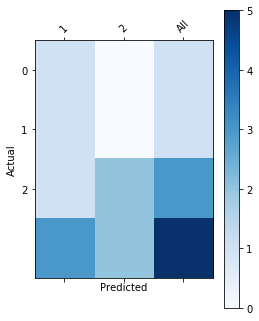

In [16]:
plot_confusion_matrix(df_confusion)

In [17]:
df_confusion

Predicted,1,2,All
Actual,,,
0,1,0,1
1,1,0,1
2,1,2,3
All,3,2,5


In [18]:
df[(df.act_cat!=df.pred_cat) & (df.modified_image=='N')]

,filename,image,act_cat_name,pred_cat_name,act_cat,pred_cat,modified_image
0,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,bed1.jpg,bed,chair,0,1,N
4,C:\Users\Vibha2023\Anaconda3\Algo\test_images\...,cupboard7.jpg,cupboard,chair,2,1,N


In [19]:
df[(df.act_cat!=df.pred_cat) & (df.modified_image=='Y')]

,filename,image,act_cat_name,pred_cat_name,act_cat,pred_cat,modified_image


In [20]:
df[(df.act_cat!=df.pred_cat) & (df.modified_image=='Y')].count()

filename          0
image             0
act_cat_name      0
pred_cat_name     0
act_cat           0
pred_cat          0
modified_image    0
dtype: int64

In [21]:
# 6 images have been wrongly classified int he original test data set.
# These 6 images will be fed to algo1 to check if it filters them as bad image

In [22]:
y_pred

0    1
1    1
2    2
3    2
4    1
Name: Predicted, dtype: object

In [23]:
df.to_csv('yourpath.csv')

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_actu.astype(int)
predicted = y_pred.astype(int)
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[0 1 0]
 [0 1 0]
 [0 1 2]]
Accuracy Score : 0.6
Report : 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.33      1.00      0.50         1
          2       1.00      0.67      0.80         3

avg / total       0.67      0.60      0.58         5



C:\Users\Vibha2023\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.metrics import cohen_kappa_score, make_scorer


In [26]:
kappa = cohen_kappa_score(actual, predicted,labels=None)

In [27]:
kappa

0.375

Here is one possible interpretation of Kappa.

Poor agreement = Less than 0.20
Fair agreement = 0.20 to 0.40
Moderate agreement = 0.40 to 0.60
Good agreement = 0.60 to 0.80
Very good agreement = 0.80 to 1.00

In [28]:
#Its a fair agreement